<a href="https://colab.research.google.com/github/Rmianm/Modelos_clasificacion-ML/blob/master/%C3%81rbol%20de%20Decisi%C3%B3n%20Titanic/%C3%81rbol_de_decisi%C3%B3n_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Invocar librerías y cargar los data sets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import tree #Modelo
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
#En esta ocasión cargamos 3 data sets, uno para entrenamiento otro para test y otra especificamente para el target
test_df = pd.read_csv('/content/drive/MyDrive/Machine L./Datasets/titanic-test.csv')
train_df = pd.read_csv('/content/drive/MyDrive/Machine L./Datasets/titanic-train.csv')
test_target = pd.read_csv('/content/drive/MyDrive/Machine L./Datasets/gender_submission.csv')

In [ ]:
train_df.head()

##Análisis de datos

In [ ]:
train_df.head(20)

In [ ]:
train_df['Survived'].unique() #Vemos loa posibles valores que toma la variable

In [ ]:
train_df.shape

In [ ]:
len(train_df.query('Survived==1')) #Los que sobrevivieron

In [ ]:
#Cuántos pasajeros habían en barco
train_df.Sex.value_counts().plot(kind = 'bar',color=['purple','orange'])
plt.title('Distribución de los pasajeros')
plt.show()

In [ ]:
train_df[(train_df.Survived == 1 )].Sex.value_counts().plot(kind='bar',color=['b','r'])
plt.title("Distribución de sobrevivientes")
plt.show()

In [ ]:
train_df.count()

In [ ]:
train_df['Sex'].dtype
#En este caso nos ladrá como string, ¿Será correcto dejarlo así?

##Procesamiento de datos

In [ ]:
#Vamos a convertir la variable categórica "Sex" a numérica con la label encoding
label_encoder = preprocessing.LabelEncoder()
encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df['Sex'] = encoder_sex
#Veremos que se puede hacer de otra manera más adecuada líneas adelante con la función get_dummies, ya te lo explicaré.

In [ ]:
train_df['Sex']

In [ ]:
#También se puede hacer de una manera primitiva jeje
test_df['Sex'].replace('male',1,inplace=True)
test_df['Sex'].replace('female',0,inplace=True)
#No lo recomiendo cuando esta variable tiene muchas categorías.

In [ ]:
#Miramos las variables que tienen datos nullos.
test_df.isnull().any()

In [ ]:
train_df.isnull().any()

In [ ]:
#Esta es una forma de llenar los datos, pero con replace puede que no funcione con algunos features por sus datos ya que generarlmente se usa para 
#Reemplazar un valor valor específico de un frame con otro valor, por ejemplo el sexo.
train_df['Age'] = train_df['Age'].replace(np.nan,train_df['Age'].median())
test_df[['Age','Fare']] = test_df[['Age','Fare']].replace(np.nan,test_df[['Age','Fare']].median())

In [ ]:
#Fillna a diferencia de replace es específicamente usado para datos nulos de un frame y es más completo ya que podemos utilizar métodos opciones
#Para personalizar cómo vamos a llenar los datos faltantes.
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
#Se utilizó la mediana porque si la distribución de la variable es sesgada por outliers o "valores atípicos" la media puede verse 
#afectada por estos valores extremos y no representar adecuadamente la tendencia central de los datos.

In [ ]:
train_predictors = train_df.drop(['PassengerId','Survived', 'Name', 'Ticket', 'Cabin','Embarked'], axis = 1)
dummy_encoded = pd.get_dummies(train_predictors)
dummy_encoded
#las variables dummy variables conviernten ligeramente las variables cateogricas en indicadoras como 0, 1
#se crean nuevas columnas por cada valor que tangan las variables cateogricas

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
888,3,28.0,1,2,23.4500,1,0
889,1,26.0,0,0,30.0000,0,1


In [ ]:
test_df[['Age','Fare']] = test_df[['Age','Fare']].fillna(test_df[['Age','Fare']].median())
test_predictors = test_df.drop(['PassengerId','Name', 'Ticket', 'Cabin','Embarked'], axis = 1)
dummy_encoded_test = pd.get_dummies(test_predictors)
dummy_encoded_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0
...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0,1
414,1,39.0,0,0,108.9000,1,0
415,3,38.5,0,0,7.2500,0,1
416,3,27.0,0,0,8.0500,0,1


In [ ]:
dummy_encoded.isnull().any()

In [ ]:
dummy_encoded_test.isnull().any()

In [ ]:
#Age, Pclass y  Fare son variables con unos valores altos respecto a los otros, así que vamos a normalizarlas
escaler = StandardScaler()
dummy_encoded_ = escaler.fit_transform(dummy_encoded)
dummy_encoded_test_ = escaler.fit_transform(dummy_encoded_test)

In [ ]:
dummy_encoded_

In [ ]:
dummy_encoded['Sex_female'].dtype
#Ahora se ha convertido a variable numérica

In [ ]:
dummy_encoded_ = pd.DataFrame(dummy_encoded_)
dummy_encoded_

In [ ]:
dummy_encoded_test_ = pd.DataFrame(dummy_encoded_test_)
dummy_encoded_test_

In [ ]:
dummy_encoded_test_.columns = dummy_encoded_test.columns

In [ ]:
dummy_encoded_test_

In [ ]:
dummy_encoded_.columns = dummy_encoded.columns
dummy_encoded_

In [ ]:
test_target_ = test_target.drop(['PassengerId'],axis=1)
test_target_

##Entrenamiento del modelo de clasificación

In [ ]:
#Continuamos con la división de los datos de entrenamiento
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_

In [ ]:
#Creamos el árbol
tree_one = tree.DecisionTreeClassifier(max_depth=3)
tree_one = tree_one.fit(x_features_one,y_target)
#Si se modifica max_depth, el árbol de decisión se construirá con una profundidad máxima diferente y, 
#por lo tanto, puede tener diferentes estructuras y desempeño.
#Si reduce la profundidad máxima, el árbol de decisión será más simple y menos profundo lo que puede ayudar a evitar el sobreajuste del modelo. 
#Sin embargo, un árbol más simple puede no capturar todas las interacciones y patrones complejos en los datos y, por lo tanto, puede tener un rendimiento inferior
#Por otro lado, si aumenta la profundidad máxima, el árbol de decisión será más complejo y puede 
#capturar más patrones en los datos, pero también corre el riesgo de sobreajustarse y no generalizar bien en datos nuevos.


In [ ]:
#¿Qué tan cercano puede agregar una etiqueta dada las caracteristicas?
tre_one_accuracy = round(tree_one.score(x_features_one,y_target),4)
print(tre_one_accuracy)
#En cuanto llegue un nuevo valor tendrá un #% de probabilidad que le asigne la etiqueta correspondiente

0.8272


In [ ]:
y_pred = tree_one.predict(dummy_encoded_test_)

In [ ]:
#Precisión de y_pred frente a la original
accuracy = accuracy_score(test_target_,y_pred)
print(f'accuracy: {accuracy}')

In [ ]:
dummy_encoded_

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,-0.737695,0.737695
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.355574,-1.355574
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.355574,-1.355574
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.355574,-1.355574
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,-0.737695,0.737695
...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,-0.737695,0.737695
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,1.355574,-1.355574
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,1.355574,-1.355574
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,-0.737695,0.737695


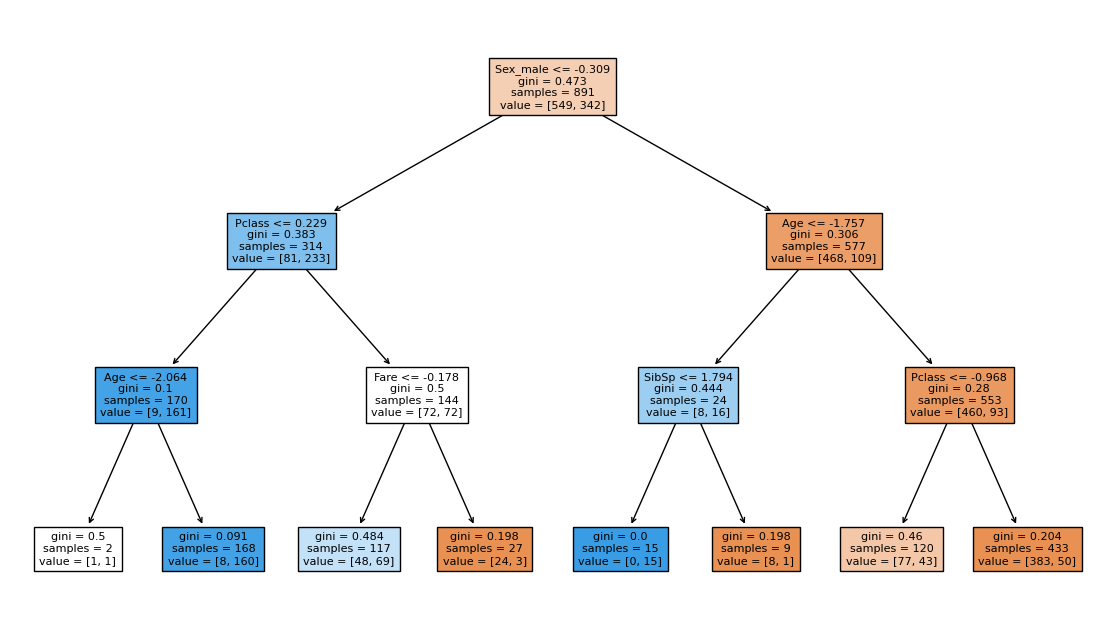

In [ ]:
#Imprimamos el árbol
plt.figure(figsize=(14, 8))
plot_tree(decision_tree = tree_one, feature_names = dummy_encoded_test_.columns, filled = True, fontsize=8);
#Adicionalmente si quieres descargar el árbol utiliza el siguiente código
#Se te descarga en tus archivos de Colab
plt.savefig('árbolD.png')